# Linear Regression


## Description

Although a traditional subject in classical statistics, you can also view **Regression** from a machine learning point of view. You'll learn more about the predictive capabilities and performance of regression algorithms. At the end of this chapter you'll be acquainted with simple linear regression, multi-linear regression.

## Overview

- Motivation for Linear Regression through the **Ames Housing dataset**
- Assumptions for Linear Regression
- Ordinary Least Squares method
- Error metrics like RMSE, R-squared, MAE


## Pre-requisite

- Python (along with NumPy and pandas libraries)
- Basic statistics (knowledge of central tendancy)


## Learning Outcomes

- Validating linear regression assumptions
- Determining co-efficients of best fit line with the help of scikit-learn (using OLS) 
- Understanding different error metrics   

## Chapter 1: Why linear regression? 

### Description: In this chapter you will be introduced to the problem statement at hand i.e. the Ames Housing dataset and how you can leverage linear regression to address the problem

### 1.1 Introduction to the problem statement: <font color='green'> Predict the Sale Price of the houses</font>


**What is the problem?**

Let’s get started to make a prediction on our first machine learning algorithm with a rich dataset on housing prices from Ames, Iowa.Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this concept, we'll build models that predict the final sale price of a house based on its other attributes. The original data set contains 82 features and 2930 data points.You can read more about this dataset [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf).
 
However, for the purpose of understanding how Linear Regression works, we will specifically, work on the following features of the house

- ExterQual
- AllFlrsSF 
- GrLivArea
- SimplOverallCond
- GarageArea
- TotRmsAbvGrd
- LotFrontage

**Brief explanation of the dataset & features**

* `ExterQual (Ordinal)`: Evaluates the quality of the material on the exterior 
      5: Excellent
      4: Good
      3: Average/Typical
      2: Fair
      1: Poor
    
* `AllFlrsSF(Continuous)`: Total square feet for 1st and 2nd floor combined
 
* `GrLivArea (Continuous)`: Above grade (ground) living area square feet

* `SimplOverallCond (Ordinal)`: Rates the overall condition of the house
      1: Bad
      2: Average
      3: Good
      
* `Garage Area (Continuous)`: Size of garage in square feet
* `TotRmsAbvGrd (Nominal)`: Total rooms above grade (does not include bathrooms)
* `LotFrontage (Continuous)`: Linear feet of street connected to property


**What we want as outcome?**

Using the set of some basic attributes that are related to the price of the house, predict the sale price for a new  house using Linear Regression.

### 1.2 Need for Linear Regression

***

**Intuition for Linear regression**

Let's start with what information we have: The main goal is to build a machine learning model which can predict the selling price of the house given some its features like `GrLivArea`, `Garage Area` etc. If you do a scatter plot our data with `SalePrice` which is the target variable and `GrLivArea`, a feature of the house, we might get something similar to the following:

<img src='../images/plt.png'>


**Know Your Linear Regression**

In simple linear regression, we establish a relationship between target variable and input variables by fitting a line, known as the regression line.

In general, a line can be represented by linear equation $y = mx + b$. Where, $y$ is the dependent variable, $x$ is the independent variable, $m$ is the slope, $b$ is the intercept.

In machine learning, we rewrite our equation as $y(x) = \theta_0 + \theta_1x$ where $\theta_i$s are the parameters of the model, $x$ is the input, and $y$ is the target variable. This is the standard notation in machine learning, and makes it easier to add more dimensions. We can simply add variables $\theta_2, \theta_3, ..., \theta_n$ and $x_2, x_3, ...$ as we add more dimensions. 

**Different values of $\theta_0$ and $\theta_1$ will give us different lines**.


Each of the values of the parameters determine what predictions the model will make. For example, let's consider $(\theta_0, \theta_1) = (0.0, 0.2)$, and the first data point, where $x = 3456$ and $y_{true} = 600$. The prediction made by the model, $y(x) = 0.0 + 0.2*3456 = 691.2$. If instead the weights were $(\theta_0, \theta_1) = (80.0, 0.15)$, then the prediction would be $y(x) = 80.0 + 0.15*3456 = 598.4$, which is much closer to the $y_{true} = 600$.

This difference between the actual value of the target and the predicted value is called the **residual**. You should always select the line with the least residual as the line fits the data points appropriately.



**Why Linear Regression for this data**

We observed linear relationship between the features to the price of the house (which is a continuous real valued number), so, it is a regression task. So, `Linear Regression` will do a good job in predicting our target i.e. **Sale Price**. 


In our dataset the linear relationship between the features and target will be captured in the following form:


***
$Sales Price = \theta_0 + \theta_1*ExterQual + \theta_2*AllFlrsSF + \theta_3*GarageArea + \theta_4*SimplOverall Cond + \theta_5*GrLivArea + \theta_6*TotRmsAbvGrd + \theta_7*LotFrontage$ 
***


Here, our main goal is to find the values of the co-efficients $\theta_0$, $\theta_1$, $\theta_2$, $\theta_3$ and $\theta_4$, $\theta_5$, $\theta_6$ and $\theta_7$ to find the best fit line representing our data points.

### Have a look at the data set 

In this task you will load the training and test datasets named as `Train.csv` and `Test.csv` from their respective filepath variables and have a look at them. 

### Instructions
- Load the datasets from their filepaths
- Split each one of them into features and target. The target variable is the last column in both the dataframes 
- Print out the first $5$ instances for training and test features

In [1]:
# import packages
import pandas as pd
import numpy as np
train_path = '../data/train.csv'
test_path = '../data/test.csv'

# Code starts here

# read data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


# split into features and target
X_train, y_train = train.iloc[:,:7], train.iloc[:,7]
X_test, y_test = test.iloc[:,:7], test.iloc[:,7]

# display first five rows of training features and target
print(X_train.head())
print(y_train.head())

# Code ends here

   ExterQual  AllFlrsSF  GrLivArea  SimplOverallCond  GarageArea  \
0          4       1316       1316                 2         397   
1          4       2028       2028                 2         880   
2          3       1072       1072                 2         525   
3          3       1048       1048                 2         286   
4          3       1779       1779                 2         546   

   TotRmsAbvGrd  LotFrontage  
0             6         65.0  
1             7         88.0  
2             5         35.0  
3             6         72.0  
4             6         80.0  
0    169990
1    369900
2    140000
3    135000
4    197900
Name: SalePrice, dtype: int64


## Quiz

1. What is the slope of a line parallel to the X-axis?

    a. 1
    
    b. 0
  
**ANS:** 0

**Explaination:** Obviously it is 0

## Chapter 2: Assumptions of Linear Regression

### Description: Before proceeding further, its important to know about the key assumptions that are made whilst dealing with Linear Regression. These are pretty intuitive and very essential to understand as they play an important role in finding out some relationships in our dataset too! 

### 2.1 Linear Relationship Assumption

***

According to this assumption the relationship between response (Dependent Variables) and feature variables (Independent Variables) should be linear.


**Why it is important?**
- Linear regression only captures the linear relationship, as its trying to fit a linear model to the data.
  
  
**How to validate it?**
- The linearity assumption can be tested using scatter plots. 
  

Below shown in a scatter plot for `SalePrice` vs `GarageArea`. You can clearly see that a linear pattern is evident here i.e. as the value of `GarageArea` increases the `SalePrice` also increases and vice-versa.
 
 <img src='../images/plt.png'>

### 2.2 Little or No Multicollinearity Assumption

***

**What is multicollinearity?**

It is assumed that there is little or no multicollinearity in the data. But what do we mean by multicollinearity? Well, multicollinearity occurs when **independent variables in a regression model are correlated**. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. 

  
**Why sweat over multicollinearity?**

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each unit change in an independent variable when you hold all of the other independent variables constant. However, when independent variables are correlated, changes in one variable in turn shifts another variable/variables. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.



**Effects of multicollinearity**

- It results in unstable parameter estimates which makes it very difficult to assess the effect of independent variables.
- Weakens the statistical power of regression model

     
**How to validate it?**

- Multicollinearity occurs when the features (or independent variables) are not independent from each other. Pair plots of features help validate. 
- You can also calculate correlation coefficient (Pearson or Spearman) to figure out which features are correlated.


**Treating multicollinearity**

- Remove some of the highly correlated independent variables.
- Linearly combine the independent variables, such as adding them together.


Below shown is a pair plot for all the features we have at hand. Feel free to investigate it. 
    
<img src='../images/pairplot.png'>

### 2.3 Homoscedasticity Assumption

***

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. 


**Why it is important**:
- Generally, non-constant variance arises in presence of outliers or extreme leverage values.


**How to validate**:
- Plot between error (residuals) vs fitted/predicted values. If there is no fan-shaped pattern visible, then it satisfies this assumption.

In the image below, shown are three different plots for residuals ($\text{True value} - \text{Predicted value}$) and $\text{Predicted value}$. Lets discuss these plots in detail:

- The left two plots are instances of heteroscedasticity where the variance either increases (left plot) or decreases (right plot). So, it violates the assumption of constant variance. 

- The rightmost plot is an instance satisfying the assumption of constant variance the residuals. 

**The residual plot i.e. Residuals** ($\text{True value} - \text{Predicted value}$) vs **Predicted value plot should aspire to achieve the third plot for linear regression.** 
    
<img src='../images/homos.jpg'>


### 2.4 Little or No autocorrelation in residuals

***

There should be little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.


**Why it is important**:
- The presence of correlation in error terms drastically reduces model's accuracy. This usually occurs in time series models. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.


**How to validate**:
- Residual vs Time plot: Look for the seasonal or correlated pattern in residual values.


In the plot below shown are two plots where the regression line (right plot) deviates from the true trend. Hence, it is necessary to take care of it.


<img src="https://image.ibb.co/cZTk28/assumption4.png" alt="drawing" width="500px"/>


### 2.5 Normal Distribution of error terms

***

A common misconception about linear regression is that it assumes that the outcome $Y$ is normally distributed. Actually, linear regression assumes normality for the residual errors ϵ, which represent variation in $Y$ which is not explained by the predictors. 


**Why it is important**:
- Due to the Central Limit Theorem, we may assume that there are lots of underlying facts affecting the process and the sum of these individual errors will tend to behave like in a zero mean normal distribution. In practice, it seems to be so.

**How to validate**:
- You can look at QQ plot of the residuals
- You should observe a normal curve on plotting a histogram of residuals
- The residual plot 

The following graphs were taken after we have calculated the residuals and made a Q-Q plot and a histogram for residuals. Observing them we can tell that they are very close to satisfying the normal distribution assumption.

<img align=left src='../images/hist.png' width=450> 

<img align=right src='../images/Qplot.png' width=450>

**Why you should care about these assumptions?**

In a nutshell, your linear model should produce residuals that have a constant variance and are normally distributed, features are not correlated with themselves or other features etc. If these assumptions hold true, the OLS procedure (discussed in the next chapter) creates the best possible estimates for the coefficients of linear regression. 

Another benefit of satisfying these assumptions is that as the sample size increases to infinity, the coefficient estimates converge on the actual population parameters.

## Chapter 3: Ordinary Least Squares

***

### Description: In this chapter you will learn about how to determine the best fit line using the method of Ordinary Least Squares

### 3.1 Mathematical notation

***

**Least Squares** 

Let's recall the equation we have considered for our problem statement earlier. 
$$\mathbf{y} = \begin{bmatrix} \mathbf{1} & \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 & \mathbf{x}_6 & \mathbf{x}_7 \\ \end{bmatrix} \times \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5 \\ \theta_6 \\ \theta_7 \\ \end{bmatrix} + \begin{bmatrix}  \varepsilon_1 \\ \varepsilon_2 \\ \varepsilon_3 \\ \varepsilon_4 \\ \varepsilon_5 \\ \varepsilon_6 \\ \varepsilon_7 \\   \end{bmatrix}$$
where  $\mathbf{x}_i$  corresponds to the feature of the house,  $\theta_i$  corresponds to the parameters/coefficients that need to be calculated,   $\varepsilon_i$  is the error term and  $\mathbf{y}$  is the target variable - Sales Price. Now this was for our specific problem, let's generalize it. 

$$X = \begin{bmatrix} \mathbf{1} & \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_k \\ \end{bmatrix}$$
Now this is a generalized matrix for k features (plus the constant 1 column). If we expand on each of the k features for n observations we get,
$$X = \begin{bmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1k}\\ 1 & x_{21} & x_{22} & \cdots & x_{2k}\\ \vdots & \vdots & \vdots & \cdots & \vdots \\ \vdots & \vdots & \vdots & \cdots & \vdots \\ 1 & x_{n1} & x_{n2} & \cdots & x_{nk}\\ \end{bmatrix}_{n\times (k+1)}$$ which is a  $n\times (k+1)$  matrix (k+1 to accomodate for column of 1). 

Then  $\mathbf{y}$  can be generalized to  $n\times 1$  vector of observations on the target variable.
$$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ \vdots \\ y_n \\ \end{bmatrix}_{n\times1}$$

Let  $\varepsilon$  be the error term associated with each observation. 
$$\varepsilon =  \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \vdots \\ \varepsilon_n \\ \end{bmatrix}_{n\times1}$$

Let  $\mathbf{\theta}$  be the coefficient of each of the features. These are the parameters that need to be estimated by the model and there would be k parameters for k features. 
$$\mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \vdots \\ \theta_k \\ \end{bmatrix}_{(k+1)\times1}$$

Combining all these we get, 

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ \vdots \\ y_n \\ \end{bmatrix}_{n\times1} = \begin{bmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1k}\\ 1 & x_{21} & x_{22} & \cdots & x_{2k}\\ \vdots & \vdots & \vdots & \cdots & \vdots \\ \vdots & \vdots & \vdots & \cdots & \vdots \\ 1 & x_{n1} & x_{n2} & \cdots & x_{nk}\\ \end{bmatrix}_{n\times (k+1)} \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \vdots \\ \theta_k \\ \end{bmatrix}_{(k+1)\times1} + \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \vdots \\ \varepsilon_n \\ \end{bmatrix}_{n\times1}$$

Or in a compressed form we can express it as 
$$\mathbf{y} = X\theta + \varepsilon$$

Our goal is to estimate the parameters in the  $\beta$  vector. The vector of residuals is given by  $\varepsilon = \mathbf{y} - X\theta$ . If we take the actual value of the residuals, they might be negative. To avoid that, we take the squared sum of the residuals. 

$$\varepsilon_0^2 + \varepsilon_1^2+\cdots+\varepsilon_n^2 = \begin{bmatrix} \varepsilon_0& \varepsilon_1& \cdots & \varepsilon_n \\ \end{bmatrix} \begin{bmatrix} \varepsilon_0 \\ \varepsilon_1 \\ \vdots \\ \varepsilon_n \\ \end{bmatrix} = \varepsilon^T\varepsilon$$

 $\varepsilon^T\varepsilon$  is also known as **cost function** which we want to minimize.

Substituting   $\varepsilon = \mathbf{y} - X\theta$  we get 

$$ \varepsilon^T\varepsilon = (\mathbf{y} - X\theta)^T (\mathbf{y} - X\theta)$$ 
 $$ \varepsilon^T\varepsilon  = (\mathbf{y}^T-(X\theta)^T)(\mathbf{y}-X\theta) $$ 
$$\varepsilon^T\varepsilon = (\mathbf{y}^T- \theta^TX^T)(\mathbf{y}-X\theta) $$
$$\varepsilon^T\varepsilon= \mathbf{y}^T\mathbf{y} - \mathbf{y}^TX\theta - \theta^TX^T\mathbf{y} + \theta^TX^TX\theta $$
$$\varepsilon^T\varepsilon= \mathbf{y}^T\mathbf{y} - 2\theta^TX^T\mathbf{y} + \theta^TX^TX\theta  $$


 $\mathbf{y}^TX\theta = \theta^TX^T\mathbf{y}$  because the transpose of a scalar is a scalar. 

Now we need to find the  $\theta$  that minimizes the sum of squared residuals. (That is why the name - Ordinary Least Squares). To find the  $\theta$ , we take derivative w.r.t  $\theta$ . 

$$ \frac{\partial\varepsilon^T\varepsilon}{\partial\theta} = -2X^T\mathbf{y} + 2X^TX\theta = 0 \\ (X^TX)\theta = X^T\mathbf{y} $$

 $X^TX$  is a square matrix ( $k+1\times k+1$ ) and it is also symmetric. By multiplying  $(X^TX)^{-1}$  both sides, we get
$$(X^TX)^{-1}(X^TX)\theta = (X^TX)^{-1}X^T\mathbf{y} $$
$$ \theta = (X^TX)^{-1}X^T\mathbf{y} $$

Let's consider a bivariate case. Here we have a single feature  $\mathbf{x}$  which influences a target variable  $\mathbf{y}$ . Let's consider n observations of the same. Then our linear regression model is  $\mathbf{y} = \theta_0 + \theta_1\mathbf{x}$ . In the matrix form, it becomes 
$$\mathbf{y} = X\theta + \varepsilon$$
$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} \theta_0 \\ \theta_1 \\ \end{bmatrix} +  \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \\ \end{bmatrix}$$
Solving using  $\theta = (X^TX)^{-1}X^T\mathbf{y}$ , we get 

$$\begin{bmatrix} \theta_0 \\ \theta_1 \\ \end{bmatrix} = \begin{bmatrix} \bar{y} - \theta_1\bar{x} \\ \frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i-\bar{x})^2 } \\ \end{bmatrix}$$

You can simplify representing the 2nd term as follows:

 $$ \theta_1 = \frac{SS_{xy}}{SS_{xx}} $$

where  $SS_{xy}$  is the sum of cross-deviations of y and x:

$$ SS_{xy} = \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) =  \sum_{i=1}^{n} y_ix_i - n\bar{x}\bar{y} $$

and  $SS_{xx}$  is the sum of squared deviations of x:

$$SS_{xx} = \sum_{i=1}^{n} (x_i-\bar{x})^2 =  \sum_{i=1}^{n}x_i^2 - n(\bar{x})^2$$
 





### 3.2 Discrete Example to understand OLS

Lets take an example to clarify the understanding of the above calculation. For simplicity we will consider only one feature i.e. `GarageArea` as our feature vector `X` and we have 'SalePrice' as our target vector `y`. Hence, we have data points as follows


| GarageArea (X) | SalePrice (y) |  
|----------------|---------------|
| 548          | 208500        |
| 460          |181500         |
| 608          | 223500       |
| 642          |140000        |
| 836          | 250000        |
| 480          |143000        |
| 636          | 307000        |
| 484          |200000        |
| 468          |129900        |
| 205          |118000         |

Let us first calculate mean of `X` and `y`

$$ \bar{x} = \frac{548+460+608+642+836+480+636+484+468+205}{10} = 536$$


$$ \bar{y} = \frac{208500+181500+223500+140000+250000+143000+307000+20000+129900+11800}{10} = 190140$$

We now need to calculate $\sum{y*x}$
$$\sum{y*x} = (208500*548) + (181500*460) + ... + (118000*205) = 1078191200$$

Next we need to calculate $\sum{x^2}$
$$\sum{x^2} = 548^2 + 460^2 + ... + 205^2 = 3122829$$

Now we will calculate sum of cross deviations and sum of squared deviations


$$ SS_{xy} = \sum_{i=1}^{n} y_ix_i - n\bar{x}\bar{y} =59040800 $$

$$SS_{xx} = \sum_{i=1}^{n} (x_i-\bar{x})^2 =  \sum_{i=1}^{n}x_i^2 - n(\bar{x})^2 = 3122829 - 10*536^2 = 249869$$



Now that we have all the values let us calculate slope and intercept

$$\text{slope} = \theta_1 = \frac{SS_{xy}}{SS_{xx}} = \frac{59040800}{249869} = 236 $$
$$\text{intercept} = \theta_0 = \bar{y} - \theta_1\bar{x} = 190140 - 236*536 = 63644$$

So now if we want to predict house price using a linear regression model fit on these 10 data points we can use following equation

$$\text{SalePrice} = 63644 + 236*\text{GarageArea}$$

## Find regression co-efficients for `GarageArea` using OLS

In this task you will be calculating the regression coefficients as well as plotting a regression line for `GarageArea` against the target variable `SalePrice`


### Instructions

- First define a function `estimate_coef()` to estimate the co-efficients of regression which takes two arguments; a feature and a target variable and returns a tuple containing the two coefficents for regression. Consult the material in the topic if you get stuck at any point
- Now, define a function `plot_regression_line()` which will plot the regression line and takes three arguments; a feature, a target variable and a tuple which consists of the regression co-efficients
- Now first estimate the coefficients of regression line for the feature `GarageArea` with respect to the target using `estimate_coef()` function that you had defined
- Using the output of the above step plot the regression line and with the help of `plot_regression_line()` and display it

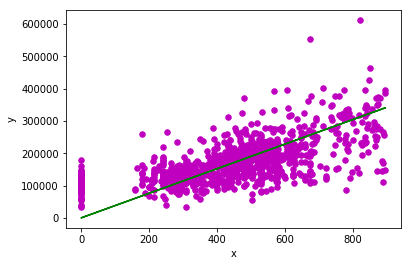

In [2]:
# import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Code starts here
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

# Visualize your results
values = estimate_coef(X_train['GarageArea'], y_train)
plot_regression_line(X_train['GarageArea'], y_train, values)

# Code ends here

## Quiz

1. The coefficients of the least squares regression line are determined by minimizing the sum of the squares of the

    a. X-coordinates
    
    b. Y-coordinates
    
    c. residuals
    
**ANS:** c.residuals

**Explaination:** If you didn't get this right, head back to the OLS section


## Chapter 4: Implementing Linear Regression with scikit-learn

### Description: In this chapter you will be using scikit learn to make predictions using linear regression and also evaluate the model

### 4.1 Model building with scikit-learn

***

Now that you have gone through the mathematical concept of **Ordinary Least Squares** let us see how we can implement the same in Python using sklearn library. The steps involved for building a model will be as follows: 

- Train the model using sklearn
- Test it on the test set using sklearn

The code snippet for model building with scikit learn is described below:
```python
# import packages
from sklearn.linear_model import LinearRegression 

# instantiate linear regression model
linreg = LinearRegression()

# fit model on training data
linreg.fit(X_train, y_train)

# make predictions on test data
pred = linreg.predict(X_test)
```

## Predict `SalePrice` with scikit-learn

In this task you are going to make predictions and then evaluate based on different error metrics like RMSE, MAE and R-squared using scikit-learn.

### Instructions
- Instantiate a linear regression model with `LinearRegression()` and save it to a variable
- Transform the target `SalePrice` using logarithmic transformation using `np.log()` to normalize it
- Then fit this model on the training data (both features and target) using `.fit()` method of the model
- After that make predictions on the test features using `.predict()` method of the model. Save these predictions for calculating the error

In [3]:
# import packages
from sklearn.linear_model import LinearRegression 

# Code starts here

# instantiate linear model
model = LinearRegression()

# fit model on training data
model.fit(X_train, np.log(y_train))

# predict on test features
y_pred = model.predict(X_test)

# display predictions
print(y_pred)

# Code ends here

[12.11227082 12.19875709 12.17873549 12.09451926 11.79496421 11.62810742
 12.23094302 11.66779875 12.83933008 11.42802489 13.03969447 11.48996121
 11.96267792 12.15572954 11.84253379 11.80049608 11.63719563 11.95712008
 12.33129216 12.18239258 12.02229166 12.0255932  12.23719561 11.87200608
 12.44798664 12.643851   12.47162239 12.5982682  11.8215798  11.50148537
 11.789251   13.22072258 11.50903908 11.87175444 12.20648447 12.23039239
 11.69069064 12.89000353 11.7661653  12.30551334 12.29771967 11.68183125
 12.84865739 11.97590572 12.48417858 12.05078167 11.76415223 11.68701845
 12.25244997 12.23563131 11.51096238 12.6868023  11.79805816 11.80839364
 12.05803133 12.79445006 12.15644059 12.02083321 11.5972928  12.61133737
 12.17873549 12.98542578 12.19936653 11.39135943 11.90586361 11.8061422
 11.79982215 11.72513481 11.82121504 11.56637513 11.81933974 12.42686173
 11.68135512 11.73767058 11.78233782 12.74326629 12.23338334 11.7939831
 12.11819825 12.03048394 11.68266492 12.12712056 11.9

### 4.2 Mean Absolute Error

***

Now that you have made your predictions on unseen data, time to test it on unseen data. You also need to have some kind of measure to quantify the performance of the model. This measure is captured by what we call the error metrics and there are many different forms depending on the problem statement. 

We have a regression problem at hand and the different types of error metric that we can use here are:
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R-Squared

Lets go through them one by one and simultaneously also see how you can calculate it with the help of scikit-learn.


**Mean Absolute Error**

So what is residual? It is the difference between our prediction and the true value. Mean absolute error is nothing by average of absolute values of these residuals. We can write a simple formula for Mean Absolute Error (MAE) as follows. 

$$MAE= \frac{1} {N}{\sum_{i=1}^N |y_{i} - \hat{y}_{i}|}$$


**Calculating MAE with scikit-learn**

Scikit-learn provides a very easy way to calculate MAE. The code snippet is shown below:
```python
# import packages
from sklearn.metrics import mean_absolute_error

# MAE calculation
mae = mean_absolute_error(y_test, y_pred)
```

The variable `mae` gives us the Mean Absolute Error for our predictions `y_pred` and true target `y_test`.

## Calculate MAE

In this task you will be calculating the MAE using scikit-learn 

### Instructions
- Calculate the MAE for the original target using `mean_absolute_error()` with the test target and prediction as arguments and save it to a variable `mae`
- Keep in mind to transform the predicted target (transformed before using log transformation) to its original scale using `np.exp()` on the predicted target
- Print it out

In [4]:
# import packages
from sklearn.metrics import mean_absolute_error

# Code starts here

# MAE calculation
mae = mean_absolute_error(y_test, np.exp(y_pred))
print(mae)

# Code ends here

29158.29503663651


### 4.3 Evaluate your model with RMSE

***

**Root Mean Square Error**

- The square root of the mean/average of the square of all of the error.
- RMSE is very commonly used and makes for an excellent general purpose error metric for numerical predictions.
- Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors.
 
 If $y_{i}$ are the actual values and $\hat{y}_{i}$ are the predicted values then,
 
 $$RMSE = {\sqrt {\frac{1} {N}{\sum\limits_{i = 1}^N {(y_{i} - \hat{y}_{i} } })^{2} } }$$


 **Why are we squaring the Residuals and then taking a root?**
   - Residuals are basically the difference between Actual Values & Predicted Values
   - Residuals can be positive or negative as the predicted value underestimates or overestimates the actual value
   - Thus to just focus on the magnitude of the error we take the square of the difference as it's always positive
     
   
 **So what is the advantage of RMS when we could just take the absolute difference instead of squaring**
   - This **severely punishes large differences** in prediction. This is the reason why RMSE is powerful as compared to Absolute Error.
   - Evaluating the RMSE and tuning our model to minimize it results in a more robust model.

## Calculate RMSE

In this task you will be calculating the RMSE for the fitted model (done in the previous task)

### Instructions
- First calculate the mean squared error  with `mean_squared_error()` with the test target and prediction as arguments
- Then find its square-root which will give the value of **RMSE** and save it to a variable `rmse`
- Here also keep in mind to transform the predicted target (transformed before using log transformation) to its original scale using `np.exp()` on the predicted target
- Print it out

In [5]:
# import packages
from sklearn.metrics import mean_squared_error

# Code starts here

rmse = np.sqrt(mean_squared_error(y_test, np.exp(y_pred)))
print(rmse)

# Code ends here

42842.8688912249


###  4.4 $R^2$ 

***

**What is R-Squared?**

R-squared is a statistical measure of how close the data are to the fitted regression line i.e. **it measures the goodness of fit of a straight line**. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 

It is a  **measure of the proportion of variability in the response that is explained by the regression model.** Mathematically,
 
$$R-squared = \frac {\text{Explained variation}}{\text{Total variation}}$$

R-squared is always between 0 and 100%:
   
 1. $0$% indicates that the model explains none of the variability of the response data around its mean.
 
 <img src='../images/r21.png'>
    
 2. $100$% indicates that the model explains all the variability of the response data around its mean.

<img src='../images/r22.png'>
  
**Graphical Intuition behind $R^2$** 

<img src='../images/rsquared.gif'>

In the above figure you are given two plots for two different regression models which has fitted responses (predicted) on the Y-axis and observed responses (true) on the Y-axis. In linear regression, you want the predicted values to be close to the actual values. So to have a good fit, that plot should resemble a straight line at $45$ degrees.

The regression model on the left accounts for around 30.0% of the variance while the one on the right accounts for around 90%. **So, the more variance that is accounted for by the regression model the closer the data points will fall to the fitted regression line.** 

Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.


**Mathematical Intuition behind $R^2$**

Before we get into calculating $R^2$, lets understand what the different Sum of Squares for our model are: 

- In RMSE, we have already been introduced to Squared Residuals which is also called Error Sum of Squares (SSE) 
   $$SSE = {\sum\limits_{i = 1}^N {(y_{i} - \hat{y}_{i} } })^{2} $$
   
- Additionally, we have the Total Sum of Squares (SST) which is nothing but the Squared difference between the Actual Values (${y}_{i}$) and the Mean of our dataset ($\bar{y}_{i}$). This is also the baseline model where we predict all the values as the mean of the true values. It doesn’t make use of any independent variables to predict the value of dependent variable $Y$. Instead it uses the mean of the observed responses of dependent variable $Y$ and always predicts this mean as the value of $Y$.

    **R-squared simply explains how good is your model when compared to this baseline model.**
   
   $$SS(Total) = {\sum\limits_{i = 1}^N {(y_{i} - \bar{y}_{i} } })^{2} $$

- And we also have Regression Sum of Squares, which is the squared difference between the Predicted values ($\hat{y}_{i}$) and the Mean ($\bar{y}_{i}$)
    $$SS(Regression) = {\sum\limits_{i = 1}^N {(\hat{y}_{i} - \bar{y}_{i} }})^{2}$$
      
Now, intuitively, we can see that: 
     $$SS(Total) = SS(Regression) + SSE$$ 
     
Thus $R^2$ is defined as: 
$$ R^2 = \frac{SS(Regression)}{SS(Total)} = 1 -\frac{\text{SSE}}{\text{SS (Total)}} $$


**Pitfalls of R-squared**

- R-squared can be made artificially high by adding more number of independent variables although they might be irrelevant. These features enable the model to learn more. As a result the model will fit the data points better or will remain the same; resulting in increased value of R-squared or remaining the same.

- R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.


**Adjusted R-squared**

To counter the issue of adding more independent variables, you should consider using the metric Adjusted R-squared instead of R-squared. Simply put it penalizes the model for adding irrelevant explanatory variables. Mathematically, $$\text{Adjusted R-squared} = 1 - (1-R^2)(\frac{n - 1}{n - p - 1})$$ 
where 

$n$ = Number of data points

$p$ = Number of explanatory/independent variables

So how is R-squared different from Adjusted R-squared? **R-squared tells you how well your model fits the data points whereas Adjusted R-squared tells you how important is a particular feature to your model.**

## Calculate R2 score

In this task you will be calculating the R2 score for the model that you had built

### Instructions
- Calculate the R2 score for the original target using `r2_score()` and store it in a variable `rsquared` 
    The syntax for the same is 
    ```python
    # import packages
    from sklearn.metrics import r2_score

    # R-squared calculation
    rsqaured = r2_score(y_test, y_pred)

    ```
    where `y_test` is the original target and `y_pred` is the predicted target
    
- Here also keep in mind to transform the predicted target (transformed before using log transformation) to its original scale using `np.exp()` on the predicted target

In [6]:
# import packages
from sklearn.metrics import r2_score

# Code starts here

# R-squared calculation
rsquared = r2_score(y_test, np.exp(y_pred))
print(rsquared)

# Code ends here

0.7378446924962254


## Quiz

1. What will happen to the value of R-squared if we increase the number of features?

    a. Increase

    b. Remain the same

    c. Decrease

**ANS:** a. or b.

**Explaination:** R-squared can never decrease on addition of features


2. A geometric interpretation of a residual is the

    a. perpendicular distance from the data point to the regression line.

    b. horizontal distance from data point to regression line

    c. vertical distance from data point to regression line

**ANS:** c.

**Explaination:** If you didn't get this right, head back to the R-squared section
